[<< nazaj: Uvod](00_uvod.ipynb)

# Enačbe in neenačbe

V tem delu si bomo ogledali različne pristope, kako se spopademo z **enačbami**. Spoznali bomo nekaj dodatnih knjižnic za python: [SymPy](http://www.sympy.org), [matplotlib](http://matplotlib.org) in [SciPy](http://www.scipy.org).

## Simbolično reševanje s SymPy

Simbolično reševanje je reševanje enačb s simboli. Ločimo ga od numeričnega reševanja enačb, pri katerem računamo z decimalnimi približki števil. Na vajah navadno uporabljamo simbolično reševanje. Enačbo, ki jo rešujemo, *mrcvarimo*, dokler ni zapisana v obliki, iz katere lahko preprosto razberemo njeno rešitev. V Pythonu lahko nekaj podobnega počnemo s SymPy.

## Primer
Poišči vse rešitve enačbe
$$x+\frac{2}{x}=3.$$
### Rešitev
Enačbo najprej pomnožimo z $x$ in preoblikujemo v polinomsko enačbo
$$ x^2+2-3x=0,$$
v kateri faktoriziramo levo stran
$$(x-2)(x-1)=0.$$
Sklepamo, da je leva stran enaka $0$, če je en od faktorjev enak $0$. 

Tako dobimo dve možnosti
\begin{eqnarray}
x-2=0 & \implies & x=2\\
x-1=0 & \implies & x=1.
\end{eqnarray}

### Sympy
Poskusimo priti do rešitve še s *Pythonom*. Najprej naložimo knjižnico za simbolično računanje [SymPy](http://www.sympy.org), nato pa deklariramo, naj se spremenljivka `x` obravnava kot matematični simbol.

In [1]:
import sympy as sym
x = sym.symbols("x") # spremenljivka x je matematični simbol

Za začetek povsem sledimo korakom, ki smo jih naredili „na roke“. Povzamimo „algoritem“

* vse člene damo na levo stran
* enačbo pomnožimo z $x$
* levo stran faktoriziramo
* iz faktorjev preberemo rešitev

In [2]:
enacba = sym.Eq(x+2/x,3)
enacba

x + 2/x == 3

Vključimo izpis formul v lepši obliki, ki ga omogoča SymPy.

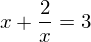

In [3]:
sym.init_printing() # lepši izpis formul
enacba

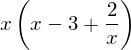

In [4]:
# vse člene damo na levo stran in pomnožimo z x
leva = (enacba.lhs - enacba.rhs)*x
leva

In [5]:
# levo stran razpišemo/zmnožimo
leva = sym.expand(leva)
leva

In [6]:
# levo stran faktoriziramo
leva = sym.factor(leva)
leva

Od tu naprej postane precej komplicirano, kako rešitve programsko izluščiti iz zadnjega rezultata. Če nas zanimajo le rešitve, lahko zgornji postopek izpustimo in preprosto uporabimo funkcijo `solve`.

In [7]:
# rešitve enačbe najlažje dobimo s funkcijo solve
resitve = sym.solve(enacba)
resitve

### Grafična rešitev
Rešitve enačbe si lahko predstavljamo grafično. Iščemo vrednosti $x$, pri katerih je leva stran enaka desni. Če narišemo graf leve in desne strani na isto sliko, so rešitve enačbe ravno *x*-koordinate presečišča obeh grafov. Za risanje grafov uporabimo knjižnico [matplotlib](http://www.matplotlib.org). Graf funkcije narišemo tako, da funkcijo tabeliramo v veliko točkah. Da lažje računamo s tabelami, uporabimo tudi knjižnico [numpy](http://www.numpy.org), ki je namenjena delu z vektorji in matrikami.

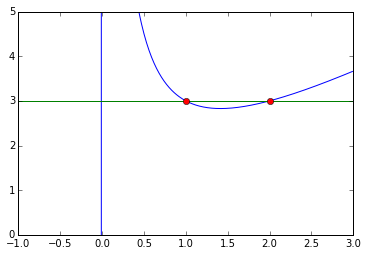

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
t = np.arange(-1,3,0.01) # zaporedje x-ov, v katerih bomo tabelirali funkcijo
leva_f = sym.lambdify(x,enacba.lhs) # lambdify iz leve strani enačbe naredi python funkcijo, ki jo uporabimo na t
desna_f = sym.lambdify(x,enacba.rhs) # podobno za desno stran (rhs - right hand side, lhs - left hand side)
plt.plot(t,leva_f(t)) # leva stran /funkcija leva_f deluje po komponentah seznama t 
plt.plot(t,[desna_f(ti) for ti in t]) # funkcija desna_t je konstanta (število 3) in zato ne vrne seznama iste dolžine kot t 
plt.ylim(0,5)
plt.plot(resitve,[leva_f(r) for r in resitve],'or')
plt.show()

## Naloga

Poišči vse rešitve enačbe 
$$x^2-2=1/x.$$
Uporabi `sympy.solve` in grafično predstavi rešitve.

[naprej: neenačbe >>](01b_neenacbe.ipynb)

In [ ]:
import disqus
%reload_ext disqus
%disqus matpy